In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train

,id,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1


In [4]:
df_test

,id,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,112,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,98,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,69,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,82,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606,137,0
96,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953,82,0
97,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608,59,0
98,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,117,0


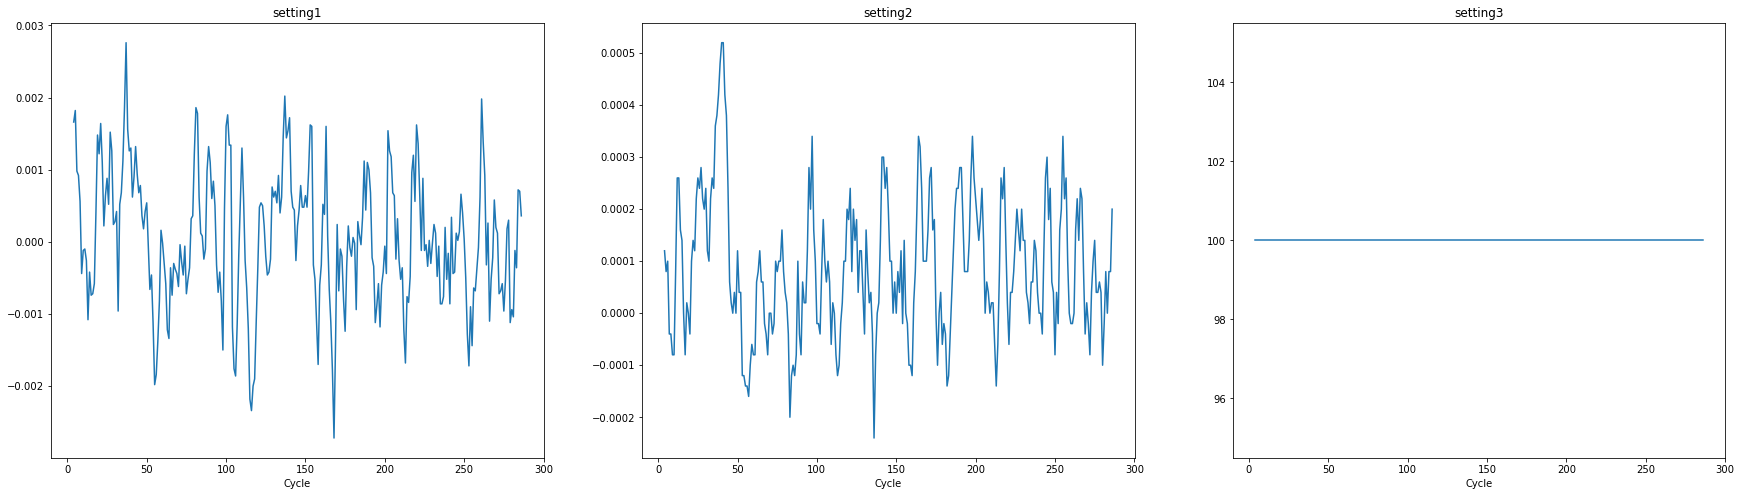

In [5]:

fig,ax=plt.subplots(1,3,figsize=(30,8),sharex='all')
for i in range(0,3):
    df_u1=df_train.query('id==2').reset_index(drop = True)
    df_u1['rolling_avg'] = df_u1['setting'+str(i+1)].rolling(window = 5).mean()
    df_u1['rolling_avg'].plot(kind = "line", ax = ax[i])
    ax[i].set_title('setting'+str(i+1))
    ax[i].set_xlabel("Cycle")

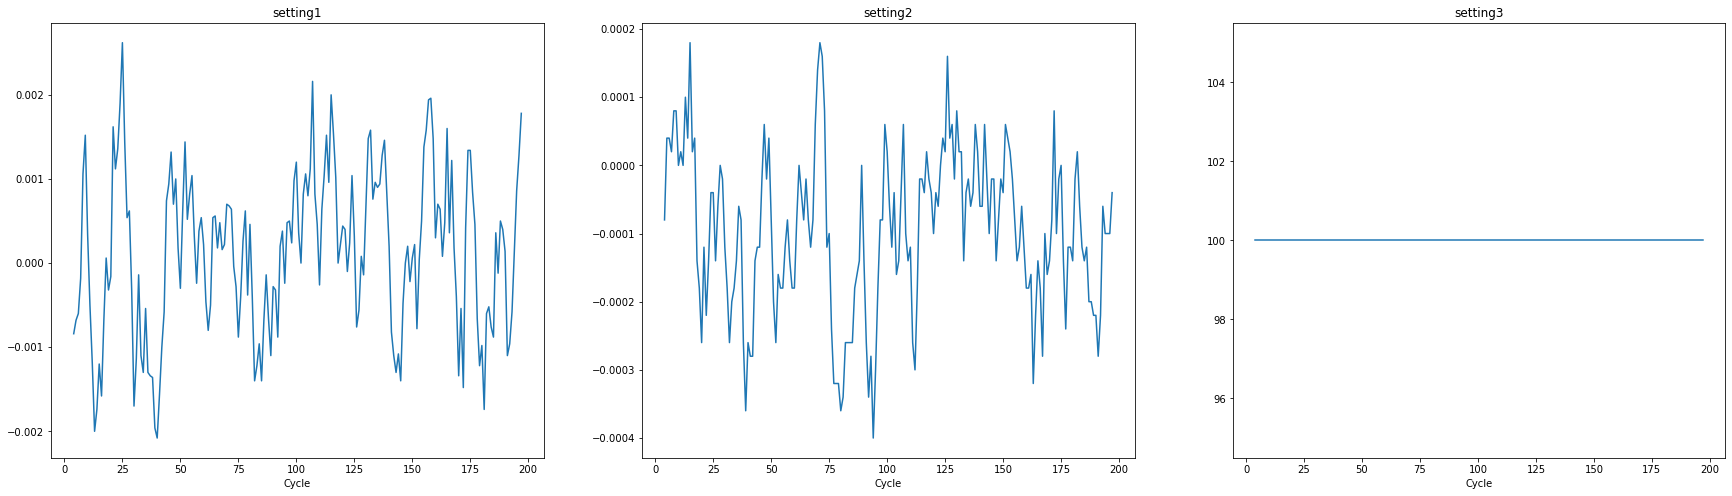

In [6]:
fig,ax=plt.subplots(1,3,figsize=(30,8),sharex='all')
for i in range(0,3):
    df_u1=df_train.query('id==50').reset_index(drop = True)
    df_u1['rolling_avg'] = df_u1['setting'+str(i+1)].rolling(window = 5).mean()
    df_u1['rolling_avg'].plot(kind = "line", ax = ax[i])
    ax[i].set_title('setting'+str(i+1))
    ax[i].set_xlabel("Cycle")

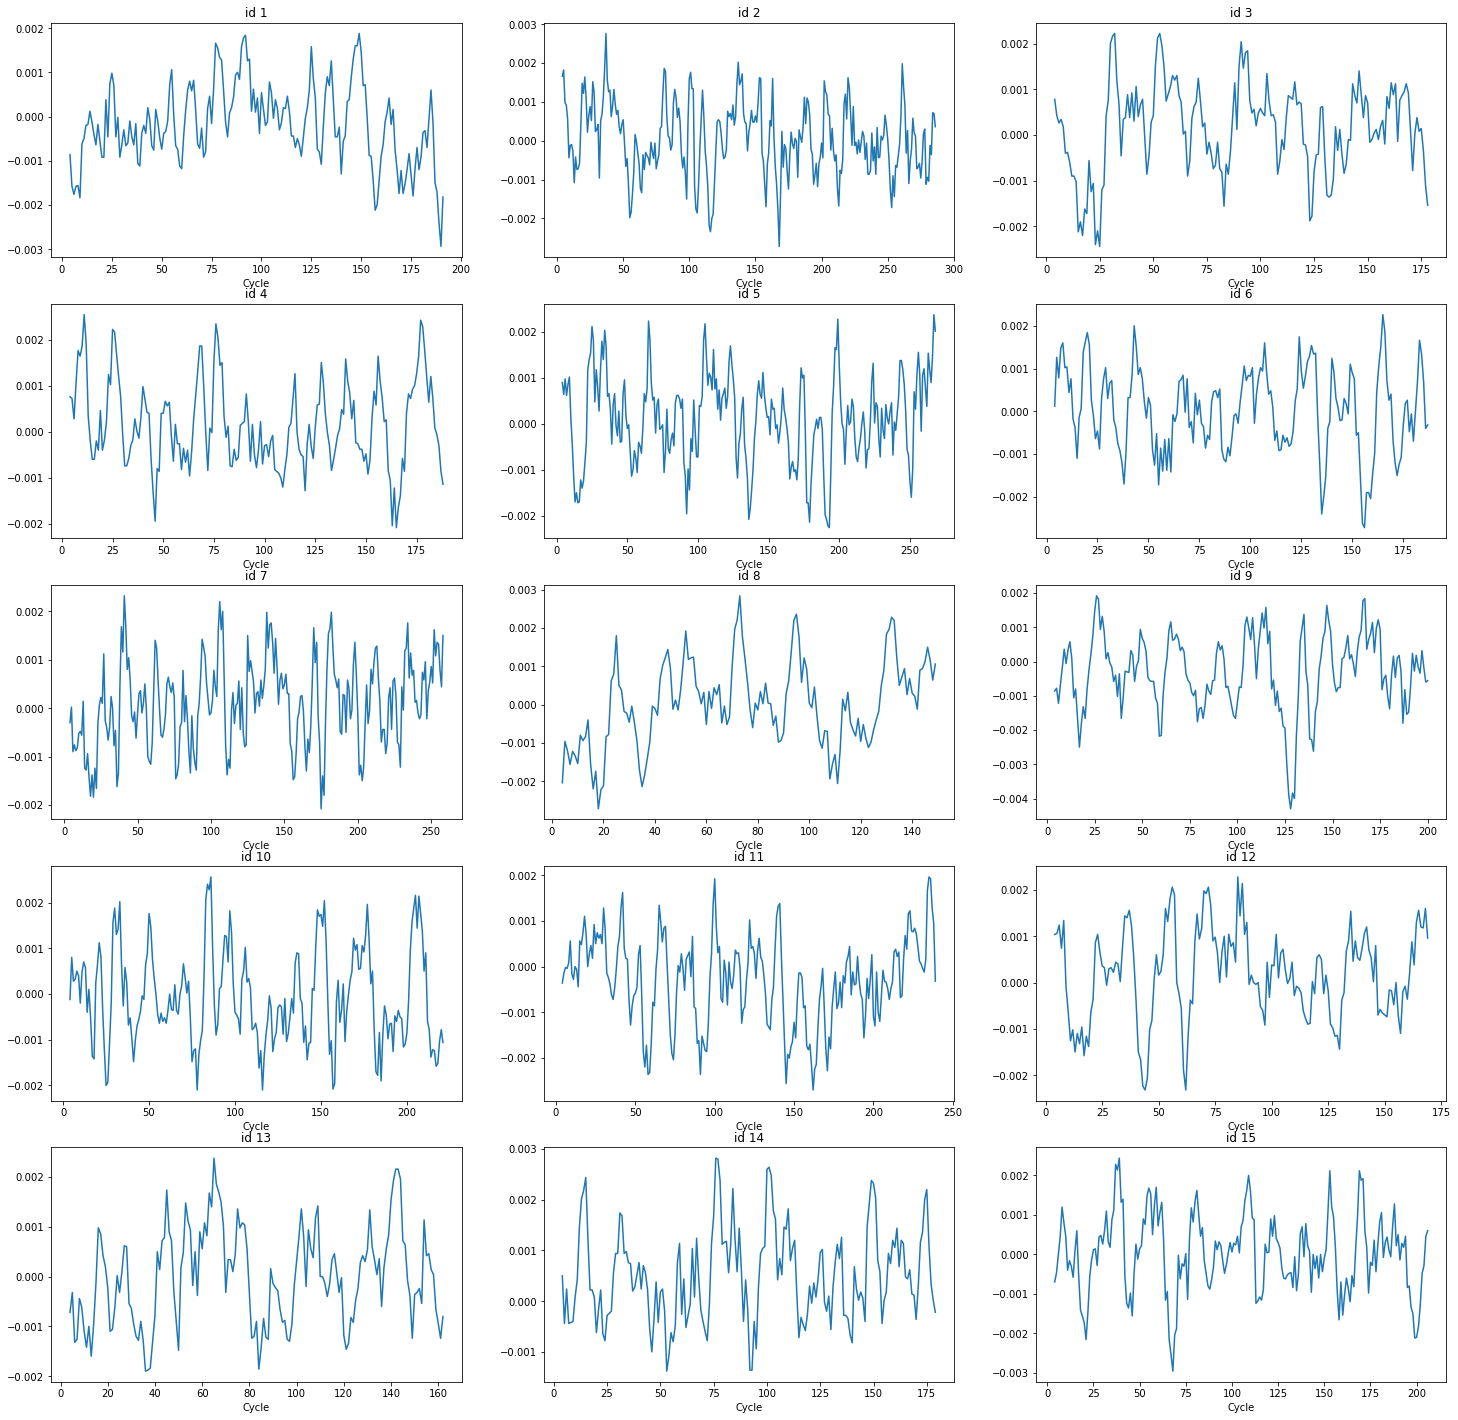

In [7]:

fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = df_train.setting1[df_train.id == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('id '+str(i+1))
    ax[i].set_xlabel("Cycle")

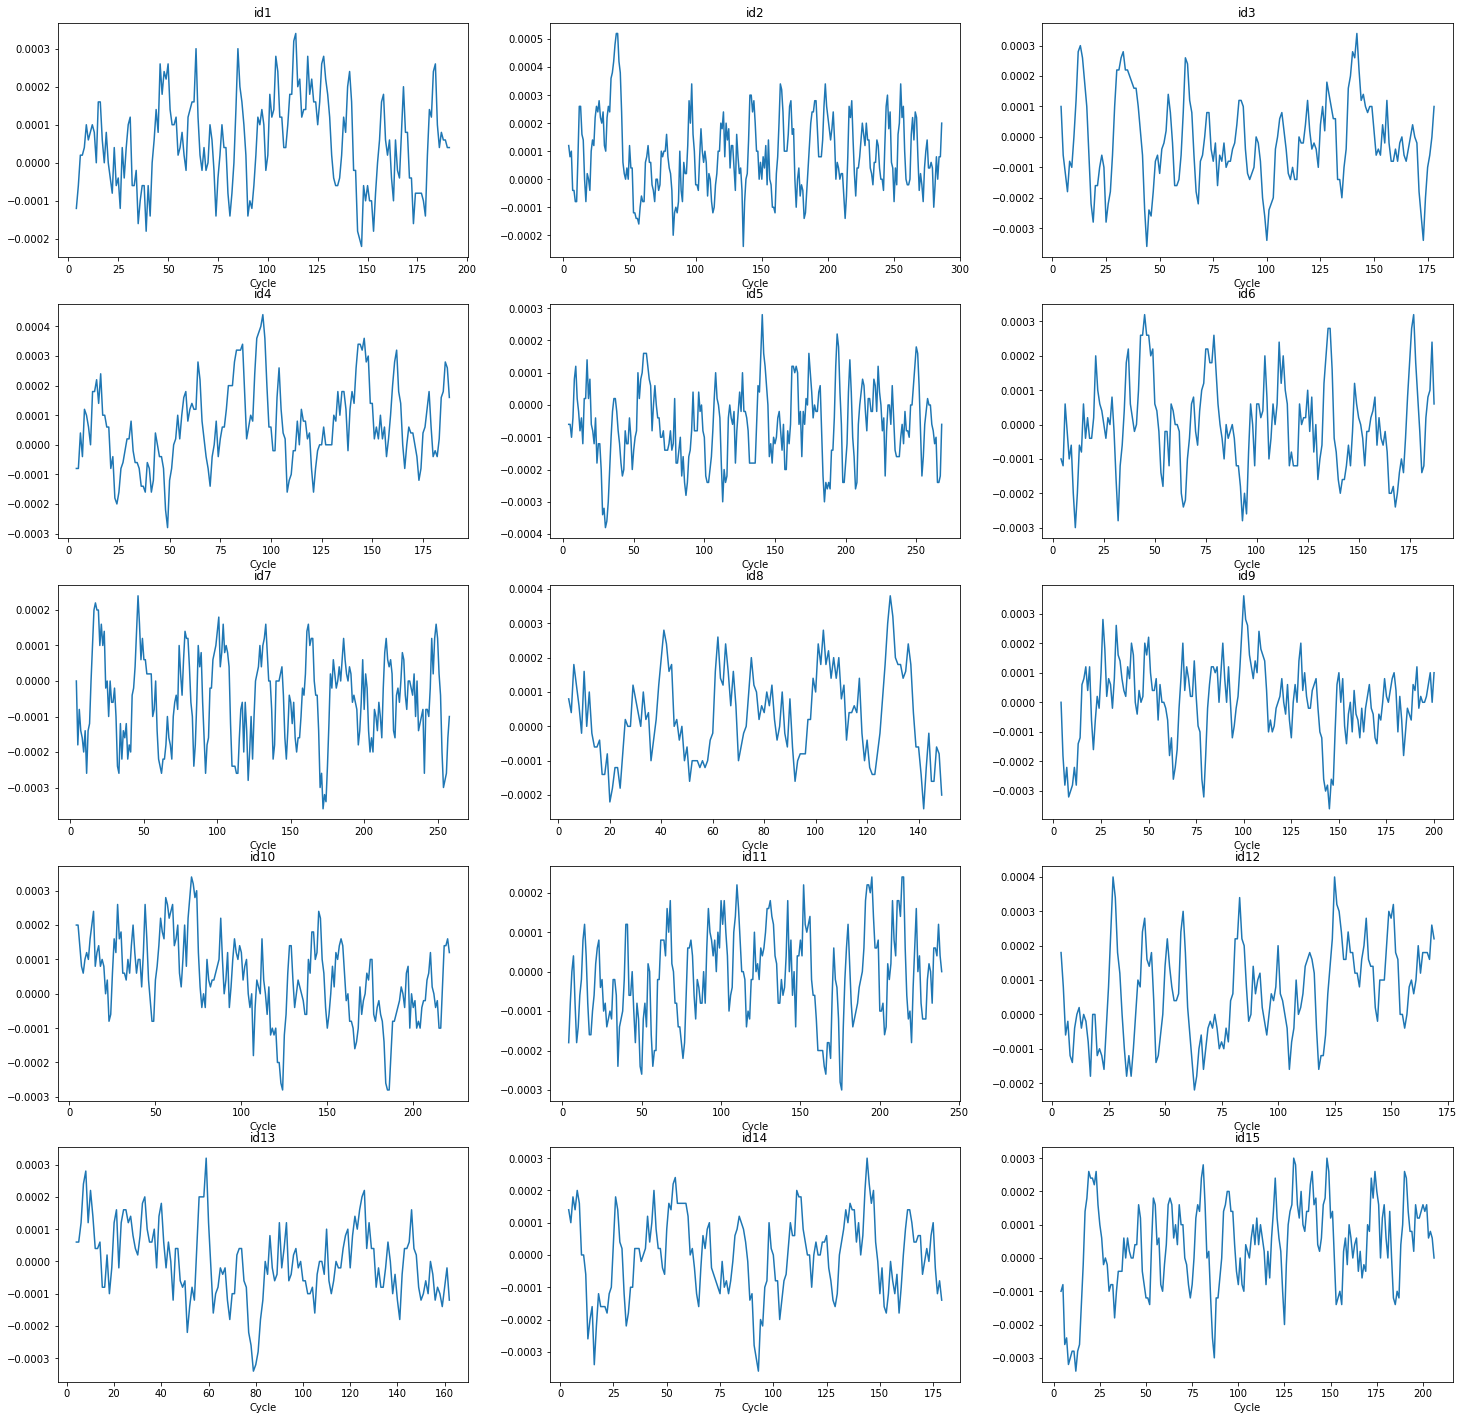

In [8]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = df_train.setting2[df_train.id == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('id'+str(i+1))
    ax[i].set_xlabel("Cycle")

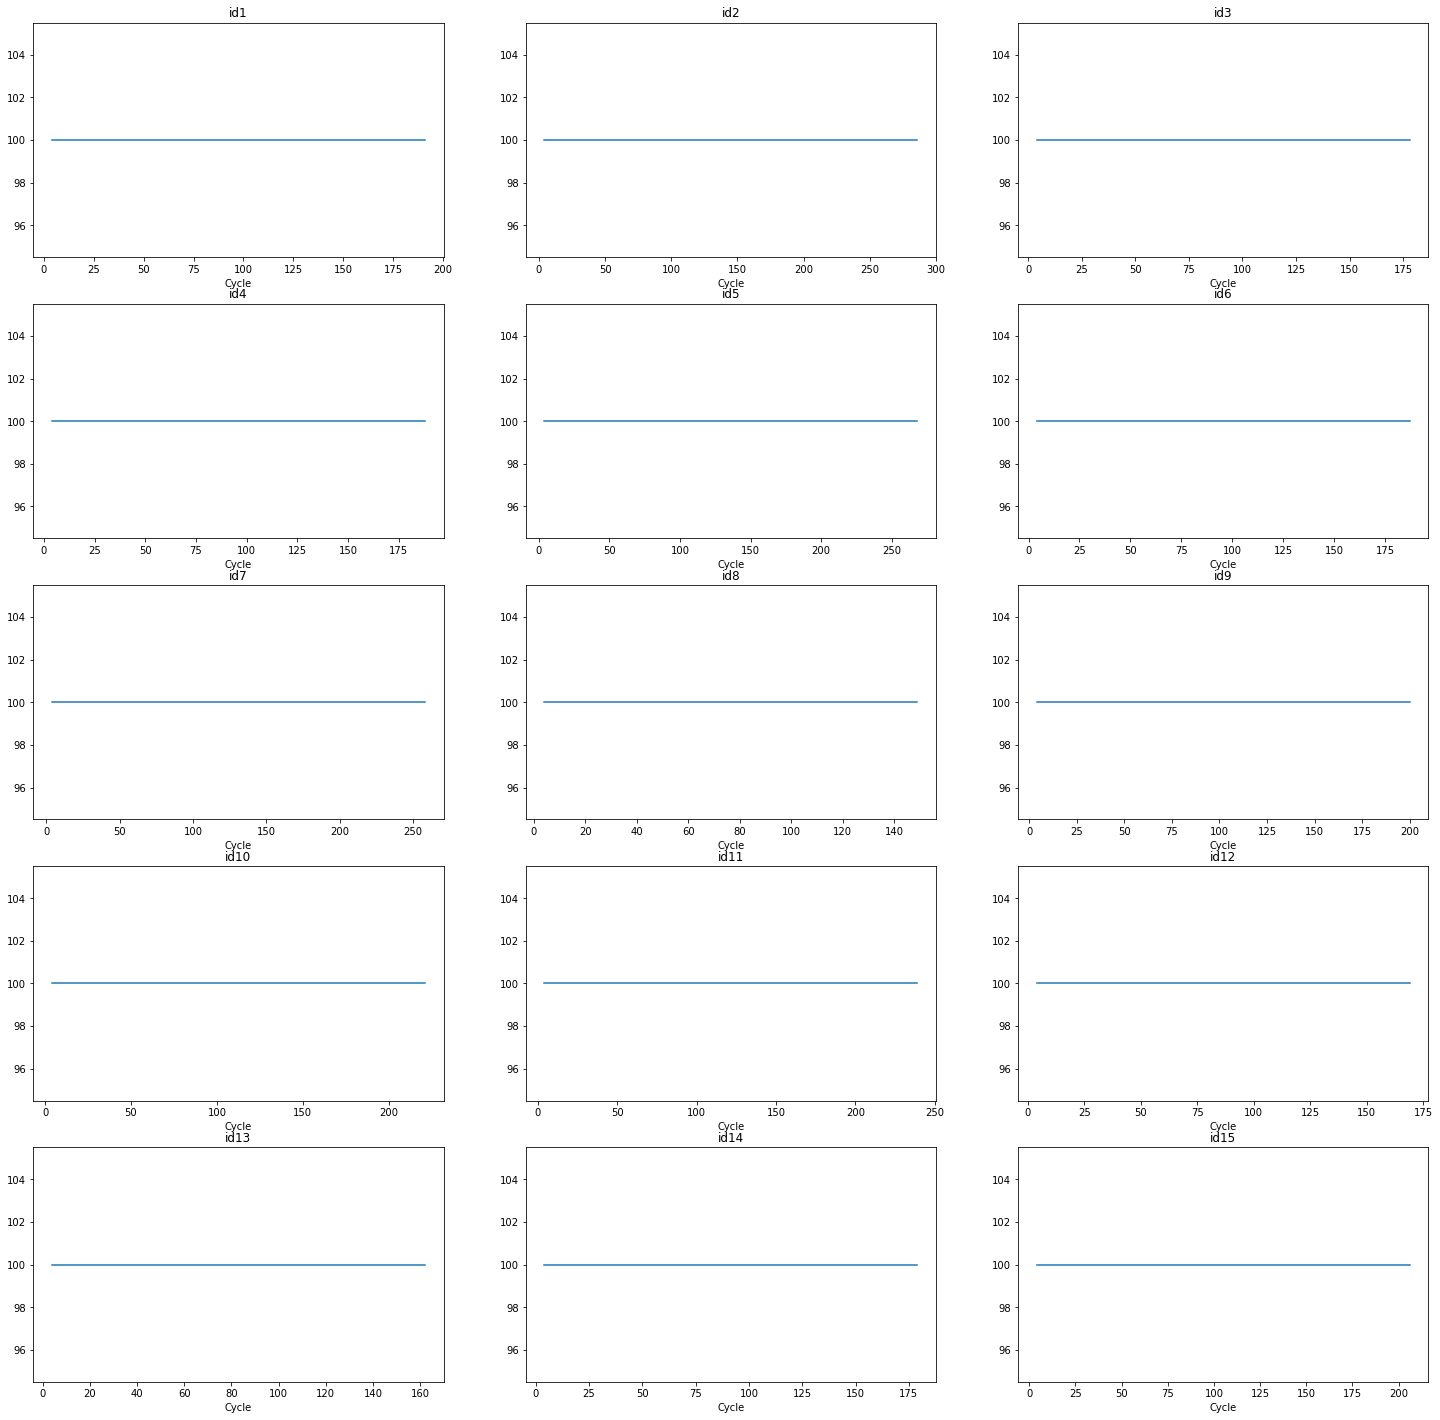

In [9]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (25,25))

ax = axes.ravel()

for i in range(0,15):
    temp = df_train.setting3[df_train.id == i+1].reset_index(drop = True).rolling(window = 5).mean()
    temp.plot(kind = "line", ax = ax[i])
    ax[i].set_title('id'+str(i+1))
    ax[i].set_xlabel("Cycle")

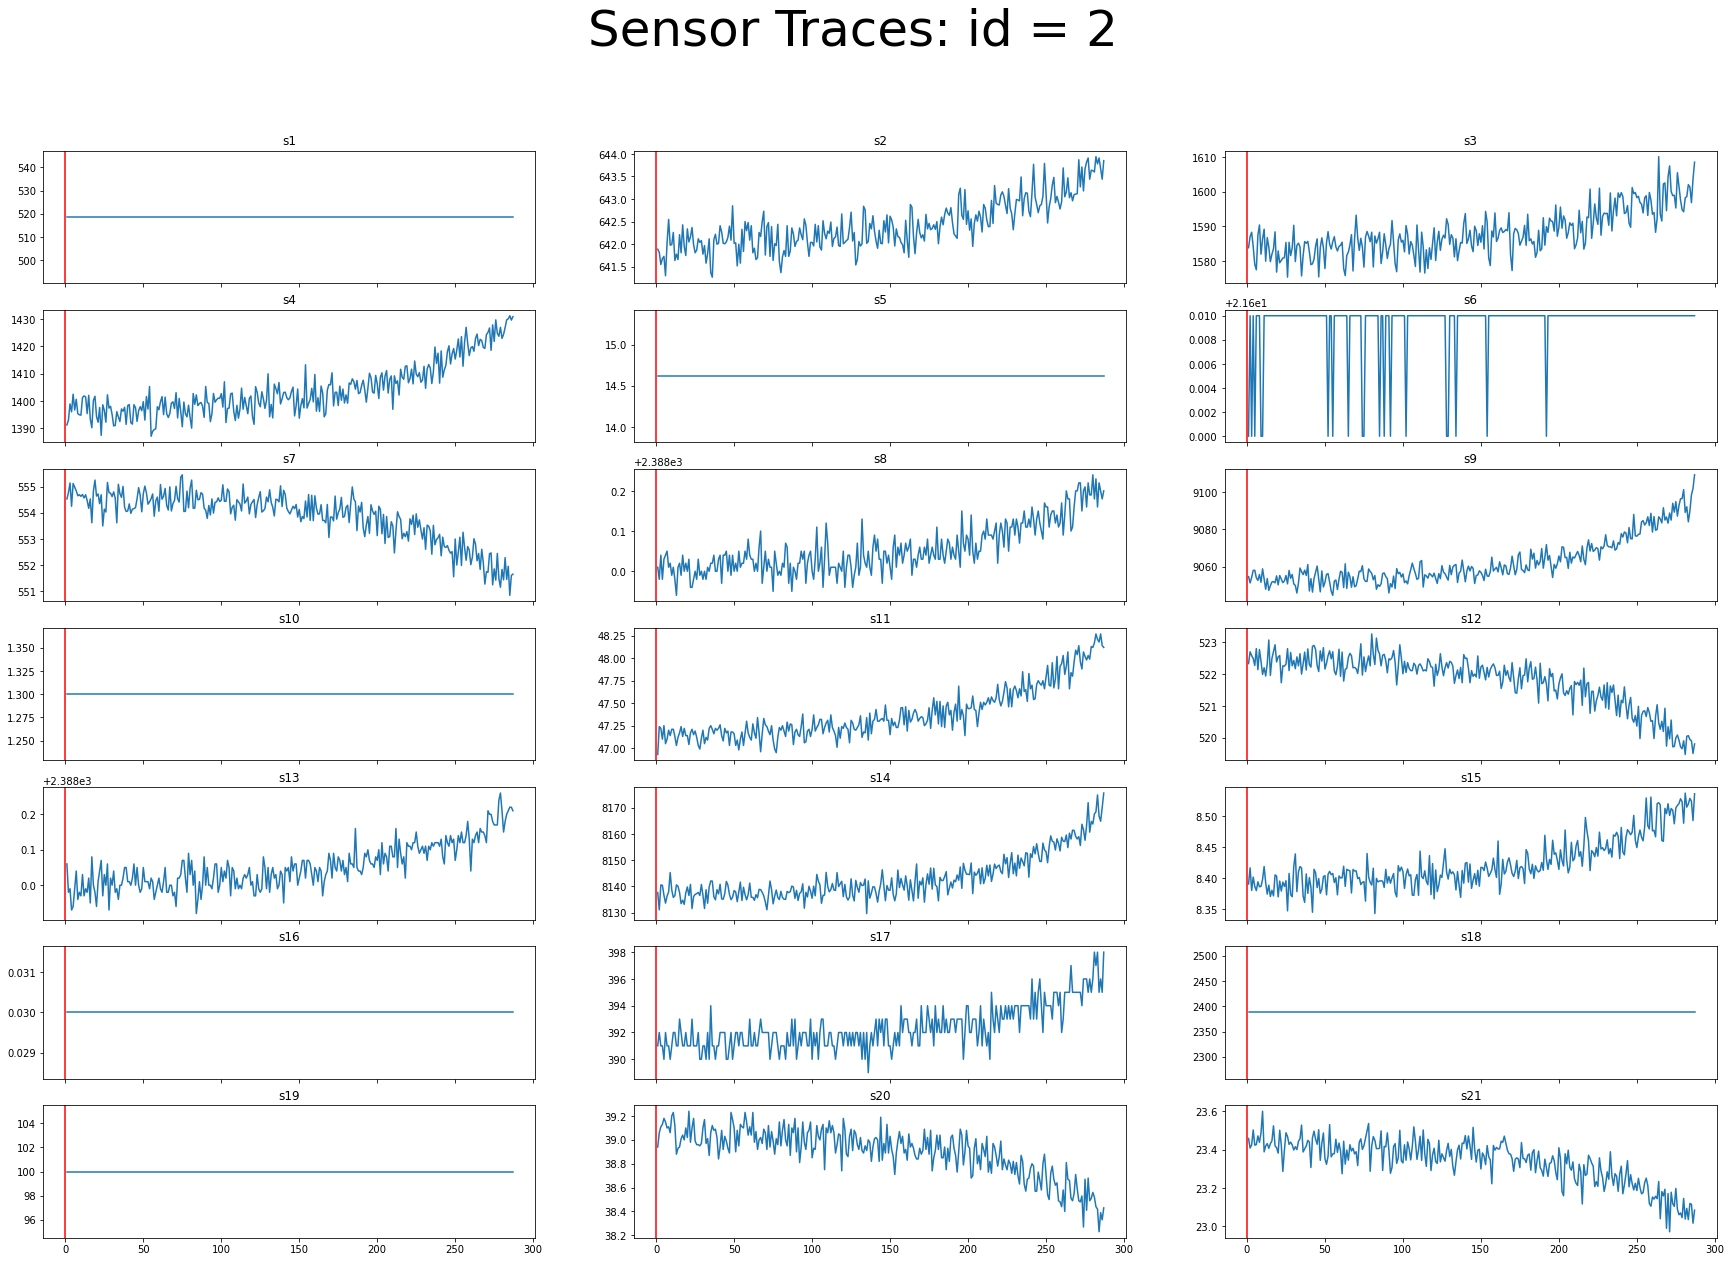

In [10]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
df_u1=df_train.query('id==2')
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_u1.Cycle.values, df_u1['s'+str(c+1)])
        ax[i,j].set_title('s'+str(c+1))
        ax[i,j].axvline(0,c='r')
        c+=1
plt.suptitle('Sensor Traces: id = 2',fontsize=50)
plt.show()

In [11]:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

In [12]:

df_train[featurs].corrwith(df_train.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -6.041754e-16
s5         -6.041754e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [13]:
low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_train[low_cor_featrs].describe()

,setting3,s1,s10,s18,s19,s16,s5,setting2,setting1
count,20631.0,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,20631.000000,20631.000000
mean,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000002,-0.000009
std,0.0,6.537152e-11,4.660829e-13,0.0,0.0,1.556432e-14,3.394700e-12,0.000293,0.002187
min,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000600,-0.008700
25%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000200,-0.001500
50%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000000,0.000000
75%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000300,0.001500
max,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000600,0.008700


In [14]:
correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

df_train[correl_featurs].describe()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,521.413470,553.367711,23.289705,38.816271,21.609803,8143.752722,9065.242941,2388.096152,2388.096652,1590.523119,393.210654,642.680934,8.442146,1408.933782,47.541168
std,0.737553,0.885092,0.108251,0.180746,0.001389,19.076176,22.082880,0.071919,0.070985,6.131150,1.548763,0.500053,0.037505,9.000605,0.267087
min,518.690000,549.850000,22.894200,38.140000,21.600000,8099.940000,9021.730000,2387.880000,2387.900000,1571.040000,388.000000,641.210000,8.324900,1382.250000,46.850000
25%,520.960000,552.810000,23.221800,38.700000,21.610000,8133.245000,9053.100000,2388.040000,2388.050000,1586.260000,392.000000,642.325000,8.414900,1402.360000,47.350000
50%,521.480000,553.440000,23.297900,38.830000,21.610000,8140.540000,9060.660000,2388.090000,2388.090000,1590.100000,393.000000,642.640000,8.438900,1408.040000,47.510000
75%,521.950000,554.010000,23.366800,38.950000,21.610000,8148.310000,9069.420000,2388.140000,2388.140000,1594.380000,394.000000,643.000000,8.465600,1414.555000,47.700000
max,523.380000,556.060000,23.618400,39.430000,21.610000,8293.720000,9244.590000,2388.560000,2388.560000,1616.910000,400.000000,644.530000,8.584800,1441.490000,48.530000


In [15]:

correl_featurs_lbl = correl_featurs + ['ttf']

<AxesSubplot:>

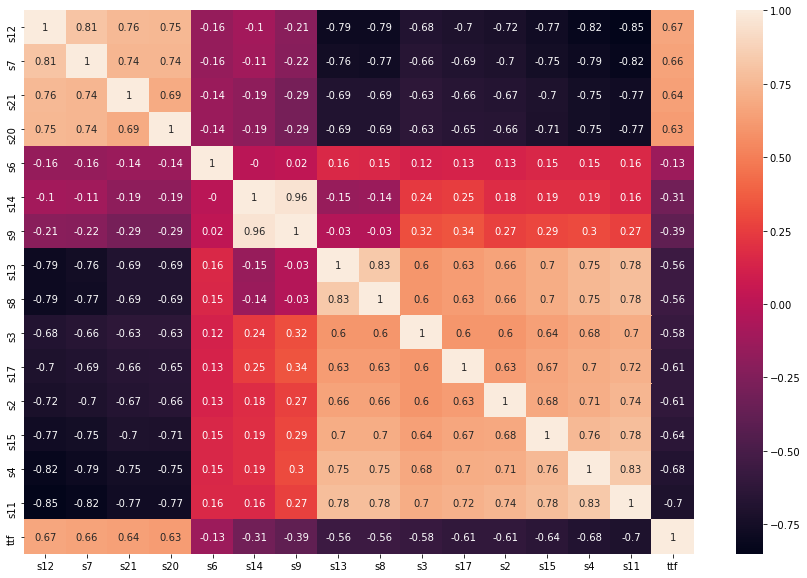

In [16]:
correlation_matrix = df_train[correl_featurs_lbl].corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, )

array([[<AxesSubplot:xlabel='s12', ylabel='s12'>,
        <AxesSubplot:xlabel='s7', ylabel='s12'>,
        <AxesSubplot:xlabel='s21', ylabel='s12'>,
        <AxesSubplot:xlabel='s20', ylabel='s12'>,
        <AxesSubplot:xlabel='s6', ylabel='s12'>,
        <AxesSubplot:xlabel='s14', ylabel='s12'>,
        <AxesSubplot:xlabel='s9', ylabel='s12'>,
        <AxesSubplot:xlabel='s13', ylabel='s12'>,
        <AxesSubplot:xlabel='s8', ylabel='s12'>,
        <AxesSubplot:xlabel='s3', ylabel='s12'>,
        <AxesSubplot:xlabel='s17', ylabel='s12'>,
        <AxesSubplot:xlabel='s2', ylabel='s12'>,
        <AxesSubplot:xlabel='s15', ylabel='s12'>,
        <AxesSubplot:xlabel='s4', ylabel='s12'>,
        <AxesSubplot:xlabel='s11', ylabel='s12'>,
        <AxesSubplot:xlabel='ttf', ylabel='s12'>],
       [<AxesSubplot:xlabel='s12', ylabel='s7'>,
        <AxesSubplot:xlabel='s7', ylabel='s7'>,
        <AxesSubplot:xlabel='s21', ylabel='s7'>,
        <AxesSubplot:xlabel='s20', ylabel='s7'>,
        <Ax

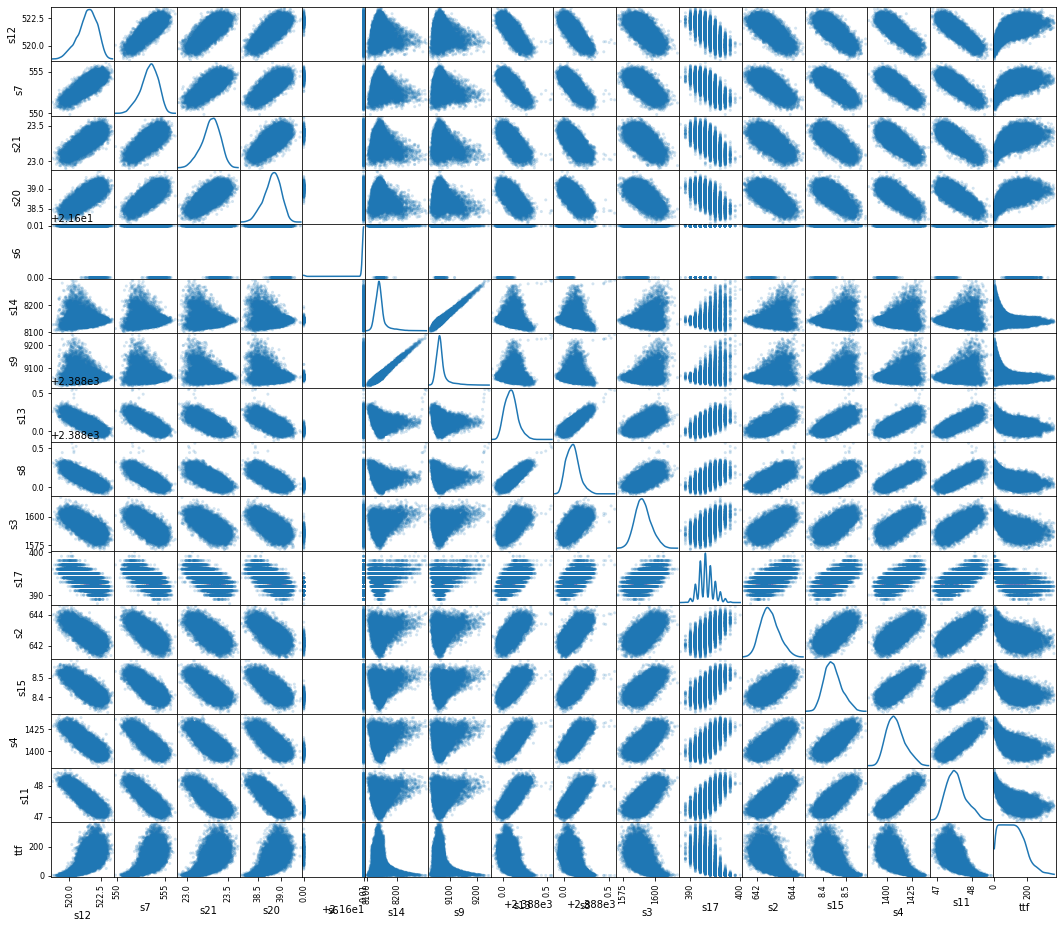

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train[correl_featurs_lbl], alpha=0.2, figsize=(18, 16), diagonal='kde')

In [18]:

def explore_col(s, e):
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_train[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_train[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_train.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / Cycle')
    sub3.set_xlabel('Cycle')
    for i in select_engines:
        df = df_train[['Cycle', s]][df_train.id == i]
        sub3.plot(df['Cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_train['ttf'],df_train[s])


    plt.tight_layout()
    plt.show()

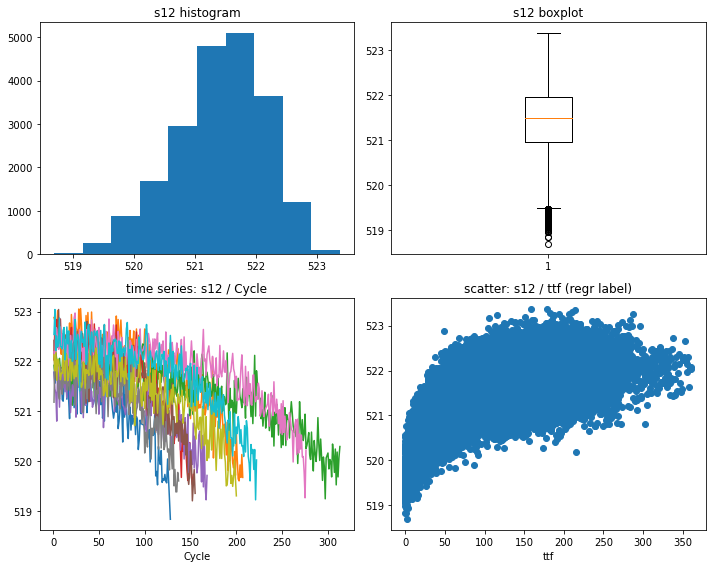

In [19]:
explore_col("s12", 10)

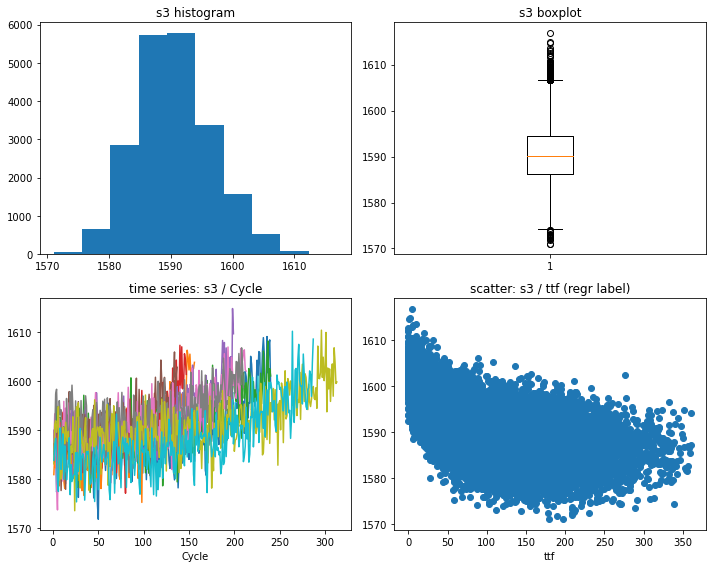

In [20]:
explore_col("s3", 10)

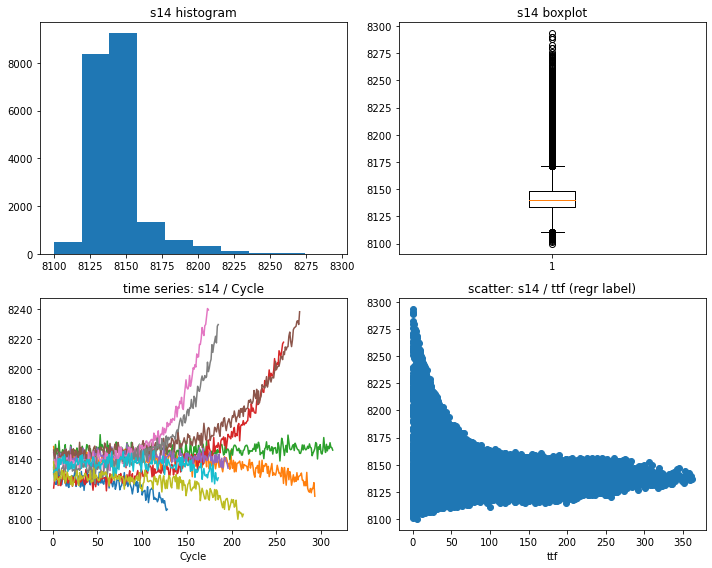

In [21]:
explore_col("s14", 10)

In [22]:
col_names = ['s12', 's7', 's21', 's20', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']